<a href="https://colab.research.google.com/github/tav-singh/InformationVisualisationGroup8/blob/master/data_viz_table3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# DATA VISUALIZATION CODE FOR TABLE 3

In [ ]:
# Python Modules
import os, glob
import pandas as pd
import shutil
import json
from urllib import request
import tarfile
import seaborn as sns
import matplotlib.pyplot as plt

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

In [ ]:
# SECTION 1: SETUP

In [ ]:
# TABLE3 data initilization

VISUALIZATION_IP = "80.112.173.20"

t3_root = "TABLE3"
t3_file_name = "data_table3.tar.gz"
t3_url = "http://beta.abijith.net/data_table3.tar.gz"

iter = 0

In [ ]:
# Function Definitions

# Get client id of a particulat experiment from IP address
def get_client_id(c_list, viz_ip):
    return next(c["client_id"] for c in c_list if c["ip_address"] == viz_ip)

def get_iter(curr_list, dir_name, iter):
  dir_split = dir_name.split("_")
  new_list = dir_split[:3]
  if (new_list == curr_list):
    return (curr_list, iter + 1)
  else:
    return (new_list, 0)
    # if (new_list[:2] == curr_list[:2])



# Add config and other info to data frame
def add_config(df, config, iter):
    df["Conference System"] = config["type"]
    df["Clients"] = config["clients_total"]
    
    df["Time"] = pd.to_datetime(df["Time"], infer_datetime_format=True)
    start_time = df["Time"][0]
    
    df["Time (s)"] = df["Time"] - start_time
    df["Time (s)"] = df["Time (s)"].apply(lambda x: x.total_seconds())
    
    df = df.drop(columns=['Time'])

    df["Iter"] = "Iteration " + str(iter)
    
    return df

In [ ]:
# Download the file, extract and aggreagte

# r = request.urlretrieve(url=t3_url, filename=t3_file_name)
tar = tarfile.open(t3_file_name, "r:gz")
tar.extractall()
tar.close()

# init empty dataframe
t3_df = pd.DataFrame()
curr_dir = []

# l = os.listdir(t3_root)
# print(sorted(l))

for f in sorted(os.listdir(t3_root)):
    
    # get experiment config
    with open(os.path.join(t3_root, f, "config.json")) as config_file:
        config = json.load(config_file)

    curr_dir,iter = get_iter(curr_dir, f, iter)
    print(f, iter)      
    # get client id of corresponding VIZ_IP and read correspong dataframe
    c_id = get_client_id(config['clients_list'], VISUALIZATION_IP)
    exp_df = pd.read_csv(os.path.join(t3_root, f, 'data_{}.csv.gz'.format(c_id)))
    
    # add config info
    exp_df = add_config(exp_df, config, iter)
    
    # Append to t3 dataframe
    t3_df = pd.concat([t3_df, exp_df], ignore_index=True)

JITSI_2_5_20201201_143123 0
JITSI_2_5_20201201_143734 1
JITSI_2_5_20201201_144346 2
JITSI_2_5_20201201_145008 3
JITSI_4_5_20201201_183105 0
JITSI_4_5_20201201_183722 1
JITSI_4_5_20201201_184338 2
JITSI_4_5_20201201_184955 3
TEAMS_2_5_20201201_152617 0
TEAMS_2_5_20201201_153239 1
TEAMS_2_5_20201201_153901 2
TEAMS_2_5_20201201_154523 3
TEAMS_4_5_20201201_194215 0
TEAMS_4_5_20201201_194842 1
TEAMS_4_5_20201201_195504 2
TEAMS_4_5_20201201_200131 3
ZOOMWEB_2_5_20201201_145619 0
ZOOMWEB_2_5_20201201_150346 1
ZOOMWEB_2_5_20201201_151133 2
ZOOMWEB_2_5_20201201_151855 3
ZOOMWEB_4_5_20201201_185611 0
ZOOMWEB_4_5_20201201_190403 1
ZOOMWEB_4_5_20201201_192439 2
ZOOMWEB_4_5_20201201_193322 3


In [ ]:
# Save file in local storage; downlaod if in Google Colab

t3_df.to_csv("table3.csv", index=False)

# if IN_COLAB:
#     # might only work in Chrome
#     google.colab.files.download("table3.csv")

In [ ]:
# SECTION 2: DATA VISUALIZATION

In [ ]:
# TODO: Add code for visualization

# Design Suggestion - Groupby Clients, then GroupBy "Conference System", then GroupBy (Time (s)) 
# then average, min, max, sd of CPU, Memory and Bandwidth

In [ ]:
#Index to be used for plots
t3_df["Conference System"] = t3_df["Conference System"].map(lambda x : "ZOOM" if x == "ZOOMWEB" else x)
t3_df['index'] = t3_df["Conference System"] + ', ' + t3_df["Clients"].map(lambda x : str(x) + ' Clients')

#Creating Memory GB column
t3_df['Memory (GB)'] = t3_df["Memory (MB)"].map(lambda x: x/1024)

#Removing 0 entries
t3_df = t3_df[(t3_df["CPU Usage (%)"] > 0.0) & (t3_df["Memory (MB)"] > 0.0) &(t3_df["Bandwidth (KB/s)"] > 0.0)]

t3_df['Bandwidth (KB/s)']

7350     64.207031
5666    389.929688
5674    379.392578
5626    345.890625
5657    347.202148
           ...    
1603     30.992188
209     199.286133
204     214.627930
205     219.323242
0        24.747070
Name: Bandwidth (KB/s), Length: 7220, dtype: float64

In [ ]:
# SECTION 3: Save plots - (download if being run in Colab)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


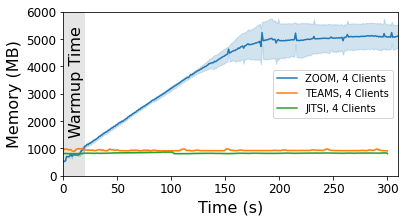

In [ ]:
import math
from pylab import *

#CPU Usage plot
# plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
# fig, ax = plt.subplots(1, 1, figsize=(8, 4))
# g = sns.lineplot(y=t3_df["Number of CPU Cores"], x= t3_df["Time (s)"] , hue="index", ci='sd', data=t3_df)
# handles, labels = ax.get_legend_handles_labels()
# # lgd = ax.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.3,1.))
# g.set(xlim=(0, 310), ylim=(0,3.1))
# fill([0,20,20,0], [0,0,3.1,3.1], 'gray', alpha=0.5)

# ax.annotate('Warmup time ends',
#             xy=(20, 100), xycoords='data',
#             xytext=(0.4, 0.15), textcoords='axes fraction',
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             horizontalalignment='right', verticalalignment='top',  fontsize='x-large')
# fig.savefig('cpu_table_3.pdf')
# # , bbox_extra_artists=(lgd,), bbox_inches='tight')
# plt.show()


#Memory Plot
t3_4_clients_df = t3_df[t3_df['Clients'] == 4]
t3_4_clients_df.sort_values(by=['Conference System'], ascending=False, inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(6, 3))
g = sns.lineplot(y="Memory (MB)", x= "Time (s)" , hue="index", ci="sd", data=t3_4_clients_df, markevery=[50], markers=["o", "^", "s"])
# , markers=True, dashes=False, style="index")
g.set(xlim=(0, 310), ylim=(0,6000))
fill([0,20,20,0], [0,0,6000,6000], 'gray', alpha=0.2)
g.text(5, 1500, "Warmup Time", rotation='vertical',size =16)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[:], labels=labels[:])
# g.set(yscale="log")
# handles, labels = ax.get_legend_handles_labels()
# lgd = ax.legend(handles, labels, loc='center right', bbox_to_anchor=(0,1.))
# ax.annotate('Warmup time ends',
#             xy=(20, 1000), xycoords='data',
#             xytext=(0.6, 0.3), textcoords='axes fraction',
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             horizontalalignment='right', verticalalignment='top', fontsize='x-large')
# plt.axvline(x=20, linestyle='dashed')
plt.subplots_adjust(top=0.86, bottom=0.1, wspace = 0.3)
fig.savefig('memory_table_3.pdf', bbox_inches='tight')
# g.set(xlim=(0, 310))
# plt.legend(prop={'size': 12})
plt.show()

#Bandwidth Plot
# fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# g = sns.lineplot(y=t3_df["Bandwidth (KB/s)"].map(lambda x: math.log(x)), x= t3_df["Time (s)"] , hue="index", ci='sd', data=t3_df)
# # g.set(yscale="log")
# g.set_ylabel("Bandwidth (Kb/s) Log Scaled")
# g.set(xlim=(0, 310))
# ax.annotate('Warmup time ends',
#             xy=(20, 28), xycoords='data',
#             xytext=(0.4, 0.35), textcoords='axes fraction',
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             horizontalalignment='right', verticalalignment='top', fontsize='x-large')
# fig.savefig('bandwidth_table_3.pdf')
# plt.show()



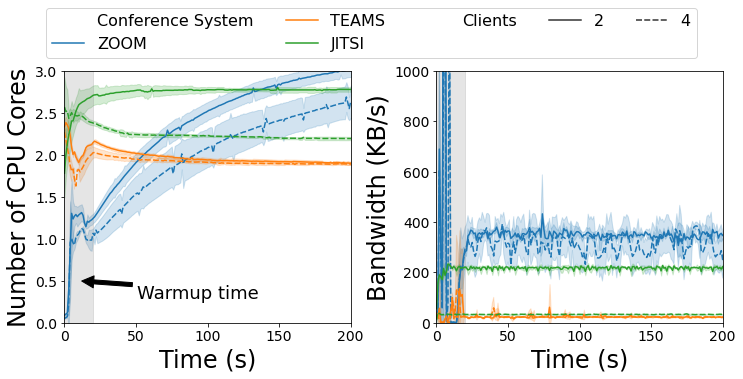

In [ ]:
# #CPU Usage plot
# plt.rcParams["axes.labelsize"] = 18
# fig, ax = plt.subplots(1, 1, figsize=(8, 4))
# g = sns.lineplot(y=t3_df["CPU Usage (%)"], x= t3_df["Time (s)"] , hue="index", ci='sd', data=t3_df)
# handles, labels = ax.get_legend_handles_labels()
# # lgd = ax.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.3,1.))
# g.set(xlim=(0, 310))
# ax.annotate('Warmup time ends',
#             xy=(20, 100), xycoords='data',
#             xytext=(0.4, 0.15), textcoords='axes fraction',
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             horizontalalignment='right', verticalalignment='top',  fontsize='x-large')
# fig.savefig('cpu_table_3.pdf')
# # , bbox_extra_artists=(lgd,), bbox_inches='tight')
# plt.show()


# #Memory Plot
# fig, ax = plt.subplots(1, 1, figsize=(8, 4))
# g = sns.lineplot(y=t3_df["Memory (MB)"], x= t3_df["Time (s)"] , hue="index", ci='sd', data=t3_df)
# # g.set(yscale="log")
# handles, labels = ax.get_legend_handles_labels()
# lgd = ax.legend(handles, labels, loc='upper left', bbox_to_anchor=(0,1.))
# ax.annotate('Warmup time ends',
#             xy=(20, 1000), xycoords='data',
#             xytext=(0.5, 0.3), textcoords='axes fraction',
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             horizontalalignment='right', verticalalignment='top', fontsize='x-large')
# fig.savefig('memory_table_3.pdf')
# g.set(xlim=(0, 310))
# plt.show()

# #Bandwidth Plot
# fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# g = sns.lineplot(y=t3_df["Bandwidth (KB/s)"], x= t3_df["Time (s)"] , hue="index", ci='sd', data=t3_df)
# g.set(yscale="log")
# g.set_ylabel("Bandwidth (Kb/s) Log Scaled")
# g.set(xlim=(0, 310))
# ax.annotate('Warmup time ends',
#             xy=(20, 28), xycoords='data',
#             xytext=(0.4, 0.35), textcoords='axes fraction',
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             horizontalalignment='right', verticalalignment='top', fontsize='x-large')
# fig.savefig('bandwidth_table_3.pdf')
# plt.show()



t3_df.sort_values(by=['Conference System'], ascending=False, inplace=True)
fig_name = "merged_plot_3.pdf"
plt.rcParams["axes.labelsize"] = 24
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
def custom_lineplot(y, x, hue, style, data_df, idx, y_low, y_max, text_loc, remove_legend=False, log_scale=False, keep_text=False):
  # g = sns.lineplot(x=x, y=y, hue=hue, data=data_df, ax=subplots[idx], ci='sd', )
  g = sns.lineplot(x=x, y=y, hue=hue, style=style, data=data_df, ax=subplots[idx], ci='sd')
  # if(log_scale):
  #   g.set_ylabel("B/W Log Exponent")
  #   g.set(yscale="log")
  #   g.set_ylabel(y + " Log Scaled")
  if remove_legend:
    subplots[idx].get_legend().remove()
    
  else:
    subplots[idx].legend(prop={'size': 14}, ncol=2)
  # if keep_text:
  #   g.text(text_loc[0], text_loc[1], "Warmup Time", size =22)
  g.set(xlim=(0,200),ylim=(y_low, y_max) )
  # g.set(xlim=(0, 200), ylim=(0,3.1))
  # fill([0,20,20,0], [0,0,3.1,3.1], 'gray', alpha=0.5)
  # g.set(xlim=(0, 310), ylim=(0,6000))
  # fill([0,20,20,0], [y_low,y_low,y_max,y_max], 'gray', alpha=0.5)
  subplots[idx].fill_between([0,20],y_low, y_max, color='gray', alpha=0.2)
  g.set_xticks([0,50,100,150,200])
  

# g.set(xlim=(0, 310), ylim=(0,3.1))
# fill([0,20,20,0], [0,0,3.1,3.1], 'gray', alpha=0.5)


fig, subplots = plt.subplots(1, 2, figsize = (10,5))
fig.tight_layout()

t3_df["Number of CPU Cores"] = t3_df['CPU Usage (%)']/100

custom_lineplot("Number of CPU Cores", "Time (s)", "Conference System", "Clients",t3_df, 0, 0, 3.0, (10, 0.1), True)
# custom_lineplot("Number of CPU Cores", "Time (s)", "index",t3_df, 0, 0, 3.0, (10, 0.1), True)

# custom_lineplot("Memory (MB)", "Time (s)", "Conference System", "Clients", t3_df, 1, 0, 6000, (8, 2000), True, keep_text=True)
# custom_lineplot(t3_df["Bandwidth (KB/s)"].map(lambda x: math.log(x)), "Time (s)", "index", t3_df, 1, -4, 10, (30, 8), True, keep_text=True, log_scale=True)
custom_lineplot(t3_df["Bandwidth (KB/s)"], "Time (s)", "Conference System", "Clients" , t3_df, 1, 0, 1000, (30, 8), True, keep_text=True, log_scale=True)
# custom_lineplot(t3_df["Bandwidth (KB/s)"].map(lambda x: math.log(x)), "Time (s)", "index", t3_df, 1, True)

handles, labels = subplots[0].get_legend_handles_labels()
plt.subplots_adjust(top=0.8, bottom=0.1, wspace = 0.3)
fig.legend(handles, labels, loc='upper center', ncol=5, prop={'size': 16})


# plt.legend(bbox_to_anchor=(1,1), loc="upper left", prop={'size': 18})
#make arrow to annotate
# subplots[0].axvline(x=20, linestyle='dashed')
subplots[0].annotate('Warmup time ',
            xy=(10, 0.5), xycoords='data',
            xytext=(0.7, 0.15), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',  fontsize=18)
# subplots[1].axvline(x=20, linestyle='dashed')
fig.savefig(fig_name, bbox_inches='tight')
# plt.show()



In [ ]:
cpu = t3_df.groupby(['Conference System', 'Clients', 'Time (s)']).agg({'CPU Usage (%)':['mean', 'std', 'min', 'max']}).reset_index()
# cpu = t3_df.groupby(['Conference System', 'Clients'])["CPU Usage (%)"].mean()
print(cpu)

memory = t3_df.groupby(['Conference System', 'Clients', 'Time (s)']).agg({'Memory (MB)':['mean', 'std', 'min', 'max']}).reset_index()
print(memory)

bandwidth = t3_df.groupby(['Conference System', 'Clients', 'Time (s)']).agg({'Bandwidth (KB/s)':['mean', 'std', 'min', 'max']}).reset_index()
bandwidth

     Conference System Clients Time (s) CPU Usage (%)                         
                                                 mean        std    min    max
0                JITSI       2      0.0    177.975000  28.883026  154.8  219.0
1                JITSI       2      1.0    199.750000  26.334072  172.1  235.4
2                JITSI       2      2.0    212.725000  24.230748  183.5  242.8
3                JITSI       2      3.0    224.100000  27.079266  192.5  258.6
4                JITSI       2      4.0    231.000000  24.963306  200.7  261.8
...                ...     ...      ...           ...        ...    ...    ...
1834           ZOOMWEB       4    315.0    292.600000  16.352064  276.1  308.8
1835           ZOOMWEB       4    316.0    230.166667  94.382749  121.6  292.7
1836           ZOOMWEB       4    317.0    284.400000  11.596551  276.2  292.6
1837           ZOOMWEB       4    318.0    284.350000  11.667262  276.1  292.6
1838           ZOOMWEB       4    319.0    292.80000

Conference System Clients Time (s)  ... Bandwidth (KB/s)                        
                                         ...              std         min         max
0                JITSI       2      0.0  ...        40.585976   18.762695   96.489258
1                JITSI       2      1.0  ...        18.263804  142.229492  184.781250
2                JITSI       2      2.0  ...         8.375588  180.962891  197.229492
3                JITSI       2      3.0  ...        20.628564  168.074219  212.146484
4                JITSI       2      4.0  ...        11.188841  159.477539  182.755859
...                ...     ...      ...  ...              ...         ...         ...
1834           ZOOMWEB       4    315.0  ...       144.721874  108.392578  392.541016
1835           ZOOMWEB       4    316.0  ...       136.932331   39.368164  313.231445
1836           ZOOMWEB       4    317.0  ...        33.887264  230.516602  278.440430
1837           ZOOMWEB       4    318.0  ...        81.103214  114.689453  229.386719
1838           ZOOMWEB       4    319.0  ...              NaN   30.703125   30.703125

[1839 rows x 7 columns]

In [ ]:
from scipy import stats


# jitsi_df = t3_df[t3_df["Conference System"] == "JITSI"]
# jitsi_df_1 = jitsi_df[jitsi_df[""]]
# zoom_df

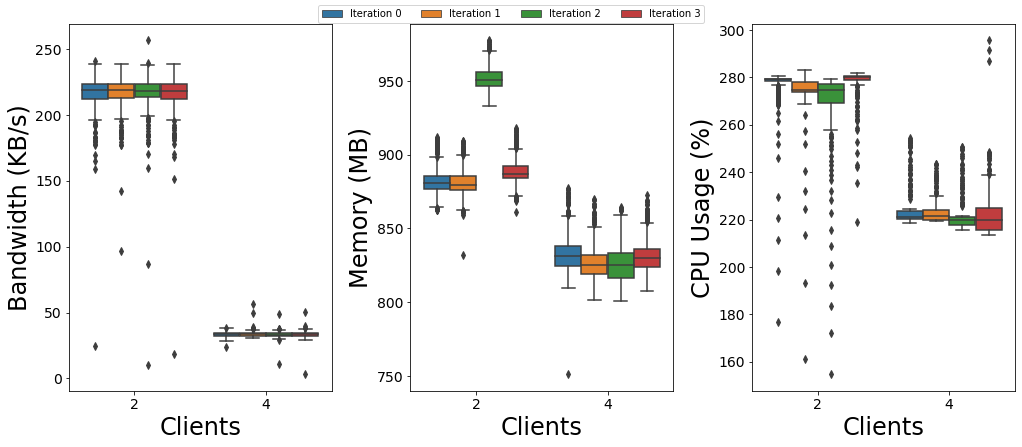

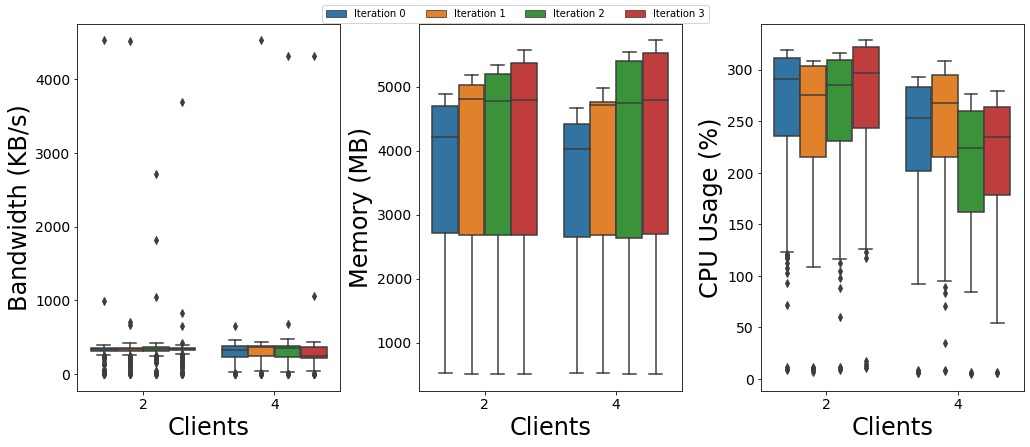

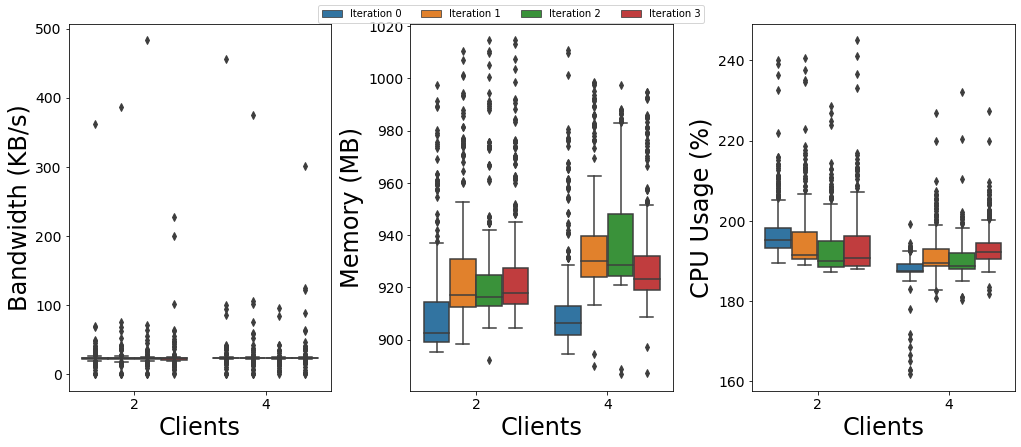

In [ ]:
#Bandwidth boxplot

def variability_plot(fig_name, df):
  #Defining the figure to plot
  fig, ax = plt.subplots(1, 3, figsize=(14, 6))
  fig.tight_layout()

  #Subplot for client
  g = sns.boxplot(x="Clients", y="Bandwidth (KB/s)", data=df, hue="Iter", ax=ax[0])
  ax[0].get_legend().remove()
  
  #subplot for memory
  sns.boxplot(x="Clients", y="Memory (MB)", data=df, hue="Iter", ax=ax[1])
  ax[1].get_legend().remove()
  
  #subplot for cpu usage
  sns.boxplot(x="Clients", y="CPU Usage (%)", data=df, hue="Iter", ax=ax[2])
  ax[2].get_legend().remove()
  
  #for the legend at the top
  handles, labels = ax[0].get_legend_handles_labels()
  plt.subplots_adjust(top=0.95, bottom=0.1, wspace = 0.3)
  fig.legend(handles, labels, loc='upper center', ncol=4)

  #save the figure
  fig.savefig(fig_name, bbox_inches='tight')
  # plt.suptitle('this is the figure title', fontsize=12)
  plt.show()


jitsi_df = t3_df[t3_df['Conference System'] == 'JITSI' ]
# t3_df_1 = t3_df[(t3_df["CPU Usage (%)"] > 0.0) & (t3_df["Memory (MB)"] > 0.0) &(t3_df["Bandwidth (KB/s)"] > 0.0)]
zoom_df = t3_df[t3_df['Conference System'] == 'ZOOMWEB' ]
teams_df = t3_df[t3_df['Conference System'] == 'TEAMS' ]

variability_plot("jitsi_variability.pdf", jitsi_df)
variability_plot("zoom_variability.pdf", zoom_df)
variability_plot("teams_variability.pdf", teams_df)

#memory boxplot
# fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# sns.boxplot(x="Clients", y="Memory (MB)", data=t3_df, hue="Conference System")
# fig.savefig('memory_variability.pdf')
# plt.show()

# #cpu boxplot
# fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# sns.boxplot(x="Clients", y="CPU Usage (%)", data=t3_df, hue="Conference System")
# fig.savefig('cpu_variability.pdf')
# plt.show()

In [ ]:
#T-test code
from scipy import stats

# jitsi_df = t3_df[t3_df['Conference System'] == 'JITSI' ]
# jitsi_iter_0 = jitsi_df[(jitsi_df['Iter'] == 0 ) & (jitsi_df['Clients'] == 2)]
# jitsi_iter_1 = jitsi_df[(jitsi_df['Iter'] == 1 ) & (jitsi_df['Clients'] == 2)]

zoom_iter_0 = zoom_df[(zoom_df['Iter'] == 0 ) & (zoom_df['Clients'] == 2)]
zoom_iter_1 = zoom_df[(zoom_df['Iter'] == 1 ) & (zoom_df['Clients'] == 2)]
zoom_iter_2 = zoom_df[(zoom_df['Iter'] == 2 ) & (zoom_df['Clients'] == 2)]
zoom_iter_3 = zoom_df[(zoom_df['Iter'] == 3 ) & (zoom_df['Clients'] == 2)]


# stats.ttest_rel(zoom_iter_2["CPU Usage (%)"], zoom_iter_3["CPU Usage (%)"])
stats.ttest_rel(zoom_iter_2["Bandwidth (KB/s)"], zoom_iter_3["Bandwidth (KB/s)"])

(nan, nan)

In [ ]:
# TODO: Add code to save/download plots

if IN_COLAB:
#     # might only work in Chrome
    # google.colab.files.download('zoom_variability.pdf')
    # google.colab.files.download('jitsi_variability.pdf')
    # google.colab.files.download('teams_variability.pdf')
    google.colab.files.download('memory_table_3.pdf')
    # google.colab.files.download('cpu_table_3.pdf')
    # google.colab.files.download('bandwidth_table_3.pdf')
    google.colab.files.download('merged_plot_3.pdf')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>